<a href="https://colab.research.google.com/github/bharatgirdhar/EVA6_Session6/blob/main/EVA6_Session_6_Assigment_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')


In [3]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
#os.listdir()
print(os.path.dirname(os.path.realpath('EVA6_Session6_Model.ipynb')))
print(os.path.dirname(os.path.realpath('EVA6_Session_6_Assigment_Layer.ipynb')))

/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks


In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install import_ipynb
import import_ipynb
import EVA6_Session6_Model as Net

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=dc74df66cd1fbd5ae766cca9f6eac8d87f651f6f58508216ad22e639bb9d721d
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from EVA6_Session6_Model.ipynb


In [5]:
!pip install torchsummary
from torchsummary import summary
vNormalizationType=0
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net.Net(vNormalizationType).to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
         GroupNorm-2            [-1, 8, 28, 28]              16
           Dropout-3            [-1, 8, 28, 28]               0
            Conv2d-4           [-1, 16, 28, 28]           1,152
         GroupNorm-5           [-1, 16, 28, 28]              32
           Dropout-6           [-1, 16, 28, 28]               0
         MaxPool2d-7           [-1, 16, 14, 14]               0
            Conv2d-8            [-1, 8, 14, 14]             128
         GroupNorm-9            [-1, 8, 14, 14]              16
          Dropout-10            [-1, 8, 14, 14]               0
           Conv2d-11            [-1, 8, 12, 12]             576
        GroupNorm-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1, 16,

EVA6_Session6_Model.ipynb:102: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [6]:


torch.manual_seed(1)
batch_size = 128

train_transform=transforms.Compose([
                        #transforms.RandomRotation(degrees=(-30,30)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])

test_transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])


train = datasets.MNIST('./data', train=True, download=True, transform=train_transform)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transform)

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
#kwargs = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

train_loader = torch.utils.data.DataLoader(
    train, batch_size=batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    test, batch_size=batch_size, shuffle=True, **kwargs)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


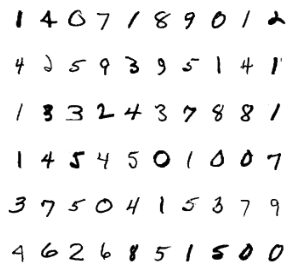

In [7]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))


dataiter = iter(train_loader)
images, labels = dataiter.next()

%matplotlib inline
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(5,5))
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [29]:
from tqdm import tqdm
import matplotlib.pyplot as plt


def train(model, device, train_loader, optimizer, epoch, vNormalizationType):
    model.train()
    train_loss=0
    pbar = tqdm(train_loader, leave="false")
    correct=0
    processed=0
    vL1Factor=0.01
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        pred = output.argmax(dim=1).float()
        #print(output.requires_grad)
        pred.requires_grad=True
        #print(pred.size())
        if vNormalizationType in (0,1):          
          loss = F.nll_loss(output, target)
        else:          
          loss = F.l1_loss(pred,target.float())
          #print(pred.size())
          #print('target',target.size())
          #loss.requres_grad= False
          #vL1=0
          #for p in Net.Net(vNormalizationType).parameters():
          #  vL1 += p.abs().sum()
          #loss= loss + vL1Factor*vL1        
        #print('loss',loss)
        train_loss += loss
        loss.backward()
        optimizer.step()
        
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx} Accuracy={100.*correct/processed:0.2f}')
    
    train_losses.append(train_loss/len(train_loader.dataset))
    train_accuracies.append(100.*correct/processed)
    
    print('\n\nEPOCH : ',epoch)
    print(f"\nTrain Loss{train_loss/len(train_loader.dataset)}")


def test(model, device, test_loader,epoch,vNormalizationType):
    model.eval()
    test_loss = 0
    correct = 0
    missed_pred=[]
    j=0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data_copy=data
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            if epoch==1:                                      
              for i in range(len(target)):
                if pred[i]!=target[i]:
                  #print('J is:', j)
                  if j in range (10):
                    j = j + 1
                                          
                    #print('Hello')

                    plt.subplot(5, 2, j)
                    plt.axis('off')
                    #plt.title(vNormalizationType)
                    plt.imshow(data_copy[i].squeeze(0), cmap='gray_r')
                    
                    #plt.savefig()
                    #plt.imshow(data_copy[i].squeeze(0))
                    #plt.show()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(100. * correct / len(test_loader.dataset))
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    

  0%|          | 0/469 [00:00<?, ?it/s]EVA6_Session6_Model.ipynb:102: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.06676837801933289 batch_id=468 Accuracy=90.50: 100%|██████████| 469/469 [00:12<00:00, 37.65it/s]



EPOCH :  1

Train Loss0.002420212375000119



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0874, Accuracy: 9727/10000 (97%)



loss=0.09006740897893906 batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:12<00:00, 38.11it/s]



EPOCH :  2

Train Loss0.0005563019658438861



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 9882/10000 (99%)



loss=0.036197688430547714 batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:12<00:00, 38.85it/s]



EPOCH :  3

Train Loss0.0004425713268574327



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 9876/10000 (99%)



loss=0.1577989012002945 batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:12<00:00, 38.12it/s]



EPOCH :  4

Train Loss0.00036560927401296794



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9915/10000 (99%)



loss=0.05537594482302666 batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:12<00:00, 37.85it/s]




EPOCH :  5

Train Loss0.0003469224611762911


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0298, Accuracy: 9905/10000 (99%)



loss=0.08426371216773987 batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:12<00:00, 37.54it/s]



EPOCH :  6

Train Loss0.00032819269108586013



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9930/10000 (99%)



loss=0.03955681994557381 batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:12<00:00, 38.22it/s]



EPOCH :  7

Train Loss0.00030402676202356815



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0265, Accuracy: 9913/10000 (99%)



loss=0.0725267305970192 batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:12<00:00, 38.02it/s]



EPOCH :  8

Train Loss0.000289006537059322



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 9923/10000 (99%)



loss=0.1170976459980011 batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:12<00:00, 38.27it/s]



EPOCH :  9

Train Loss0.00027759771910496056



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0282, Accuracy: 9908/10000 (99%)



loss=0.05291731655597687 batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:12<00:00, 37.95it/s]




EPOCH :  10

Train Loss0.0002558035193942487


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 9923/10000 (99%)



loss=0.0026808094698935747 batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:12<00:00, 38.04it/s]



EPOCH :  11

Train Loss0.000256155472015962



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9934/10000 (99%)



loss=0.06150822341442108 batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:12<00:00, 38.00it/s]



EPOCH :  12

Train Loss0.00024592207046225667



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0236, Accuracy: 9925/10000 (99%)



loss=0.017499981448054314 batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:12<00:00, 38.45it/s]



EPOCH :  13

Train Loss0.0002348204725421965



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9934/10000 (99%)



loss=0.02854493260383606 batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:12<00:00, 37.80it/s]



EPOCH :  14

Train Loss0.0002292698045494035



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9941/10000 (99%)



loss=0.008746755309402943 batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:12<00:00, 37.58it/s]



EPOCH :  15

Train Loss0.00022649552556686103



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9930/10000 (99%)



loss=0.0052145845256745815 batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:12<00:00, 37.76it/s]



EPOCH :  16

Train Loss0.00022538285702466965



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 9944/10000 (99%)



loss=0.04946829751133919 batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:12<00:00, 37.56it/s]



EPOCH :  17

Train Loss0.00020794515148736537



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9931/10000 (99%)



loss=0.03232533857226372 batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:12<00:00, 37.32it/s]



EPOCH :  18

Train Loss0.00021648751862812787



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9935/10000 (99%)



loss=0.05620485916733742 batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:12<00:00, 37.79it/s]



EPOCH :  19

Train Loss0.00019999203504994512



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9928/10000 (99%)



loss=0.014039251022040844 batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:12<00:00, 37.94it/s]



EPOCH :  20

Train Loss0.00020542749552987516



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9943/10000 (99%)



loss=0.021053055301308632 batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:12<00:00, 37.30it/s]



EPOCH :  1

Train Loss0.00020009902073070407



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9937/10000 (99%)



loss=0.0028604401741176844 batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:12<00:00, 37.18it/s]



EPOCH :  2

Train Loss0.00019587475981097668



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9937/10000 (99%)



loss=0.03191377595067024 batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:12<00:00, 36.71it/s]



EPOCH :  3

Train Loss0.00019874892313964665



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9930/10000 (99%)



loss=0.006380522157996893 batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:12<00:00, 37.62it/s]



EPOCH :  4

Train Loss0.00018188741523772478



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99%)



loss=0.01694885455071926 batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:12<00:00, 37.27it/s]




EPOCH :  5

Train Loss0.00017775826563593


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 9949/10000 (99%)



loss=0.004997799638658762 batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:12<00:00, 38.19it/s]



EPOCH :  6

Train Loss0.00019135966431349516



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9928/10000 (99%)



loss=0.020291931927204132 batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:12<00:00, 37.82it/s]



EPOCH :  7

Train Loss0.00018071869271807373



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9929/10000 (99%)



loss=0.049500081688165665 batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:12<00:00, 37.75it/s]



EPOCH :  8

Train Loss0.0001775023847585544



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9946/10000 (99%)



loss=0.004582014866173267 batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:12<00:00, 37.93it/s]



EPOCH :  9

Train Loss0.00017121860582847148



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 9949/10000 (99%)



loss=0.003792121075093746 batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:12<00:00, 37.83it/s]




EPOCH :  10

Train Loss0.00017649951041676104


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0150, Accuracy: 9945/10000 (99%)



loss=0.010301117785274982 batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:12<00:00, 37.45it/s]



EPOCH :  11

Train Loss0.00016080401837825775



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9936/10000 (99%)



loss=0.02064802683889866 batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:12<00:00, 37.20it/s]



EPOCH :  12

Train Loss0.00016485663945786655



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9941/10000 (99%)



loss=0.03383694961667061 batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:13<00:00, 35.04it/s]



EPOCH :  13

Train Loss0.00016800820594653487



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 9942/10000 (99%)



loss=0.034063149243593216 batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:13<00:00, 34.76it/s]



EPOCH :  14

Train Loss0.0001635271037230268



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9939/10000 (99%)



loss=0.0017672948306426406 batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 35.19it/s]



EPOCH :  15

Train Loss0.00015352567424997687



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 9947/10000 (99%)



loss=0.008544367738068104 batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:12<00:00, 36.97it/s]



EPOCH :  16

Train Loss0.00015272811288014054



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0155, Accuracy: 9945/10000 (99%)



loss=0.004181898199021816 batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:12<00:00, 36.46it/s]



EPOCH :  17

Train Loss0.00016766833141446114



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 9953/10000 (100%)



loss=0.009482194669544697 batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:12<00:00, 36.57it/s]



EPOCH :  18

Train Loss0.00015120167518034577



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9945/10000 (99%)



loss=0.012766756117343903 batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:12<00:00, 36.39it/s]



EPOCH :  19

Train Loss0.00015645437815692276



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 9950/10000 (100%)



loss=0.022248493507504463 batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:12<00:00, 36.62it/s]




EPOCH :  20

Train Loss0.0001531976304249838


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9948/10000 (99%)



loss=0.0416666679084301 batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:11<00:00, 39.62it/s]



EPOCH :  1

Train Loss0.00019079861522186548



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9939/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:11<00:00, 39.67it/s]



EPOCH :  2

Train Loss0.00018580729374662042



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9940/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:11<00:00, 39.94it/s]




EPOCH :  3

Train Loss0.00018828125030267984


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9939/10000 (99%)



loss=0.03125 batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:12<00:00, 38.96it/s]



EPOCH :  4

Train Loss0.00018124999769497663



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9937/10000 (99%)



loss=0.03125 batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:11<00:00, 39.43it/s]




EPOCH :  5

Train Loss0.0001950520818354562


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9939/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:11<00:00, 39.68it/s]



EPOCH :  6

Train Loss0.0002136718831025064



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9937/10000 (99%)



loss=0.0416666679084301 batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:11<00:00, 40.06it/s]



EPOCH :  7

Train Loss0.0001863715297076851



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9943/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:11<00:00, 39.47it/s]



EPOCH :  8

Train Loss0.0001839843753259629



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9938/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:11<00:00, 39.62it/s]




EPOCH :  9

Train Loss0.0001944010437000543


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9940/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:11<00:00, 39.77it/s]




EPOCH :  10

Train Loss0.00019713542133104056


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9936/10000 (99%)



loss=0.0520833358168602 batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:12<00:00, 37.19it/s]



EPOCH :  11

Train Loss0.00018263889069203287



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9939/10000 (99%)



loss=0.010416666977107525 batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:12<00:00, 37.37it/s]



EPOCH :  12

Train Loss0.000187934041605331



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9940/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:12<00:00, 36.81it/s]



EPOCH :  13

Train Loss0.00018541666213423014



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9939/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:12<00:00, 36.52it/s]



EPOCH :  14

Train Loss0.0001903645897982642



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9937/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:13<00:00, 34.99it/s]



EPOCH :  15

Train Loss0.00017669271619524807



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9939/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:13<00:00, 34.89it/s]



EPOCH :  16

Train Loss0.00018294270557817072



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9935/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.37: 100%|██████████| 469/469 [00:12<00:00, 36.11it/s]



EPOCH :  17

Train Loss0.00018736979109235108



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9938/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:12<00:00, 36.83it/s]



EPOCH :  18

Train Loss0.00017838542407844216



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9940/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:12<00:00, 38.37it/s]



EPOCH :  19

Train Loss0.00018307291611563414



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9941/10000 (99%)



loss=0.0 batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:12<00:00, 38.92it/s]




EPOCH :  20

Train Loss0.00017552083590999246

Test set: Average loss: 0.0190, Accuracy: 9939/10000 (99%)



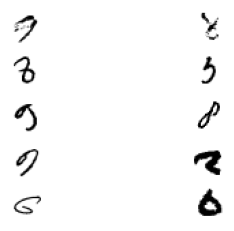

In [30]:
from torch.optim.lr_scheduler import StepLR

fig=plt.figure()
model = Net.Net(vNormalizationType).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.06, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.2)

All_test_losses=[]
All_test_accuracies=[]
All_train_losses=[]
All_train_accuracies=[]

for vNormalizationType in range(0,3):
  
  test_losses=[]
  train_losses=[]

  test_accuracies=[]
  train_accuracies=[]
  for epoch in range(1, 21):
      train(model, device, train_loader, optimizer, epoch,vNormalizationType)
      test(model, device, test_loader,epoch,vNormalizationType)
  
  All_train_losses.append(train_losses)
  All_train_accuracies.append(train_accuracies)
  All_test_losses.append(test_losses)
  All_test_accuracies.append(test_accuracies)

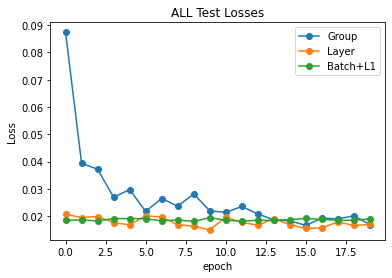

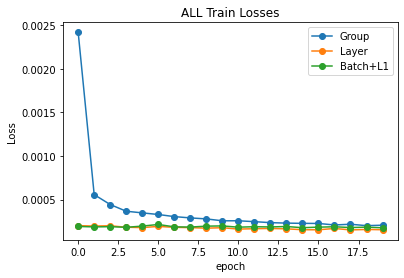

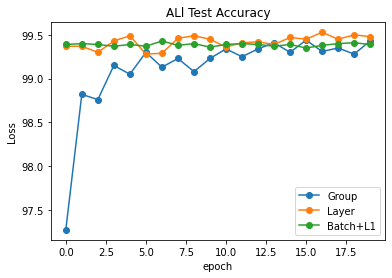

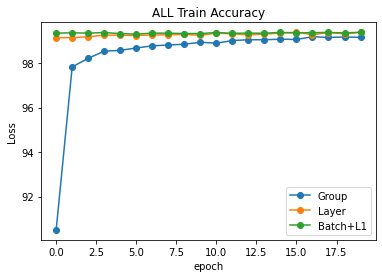

In [44]:
#For i in range (0,3):
import numpy as np

plt.plot(np.array(All_test_losses[0]),'-o')
plt.plot(np.array(All_test_losses[1]),'-o')
plt.plot(np.array(All_test_losses[2]),'-o')

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Group','Layer','Batch+L1'])
plt.title('ALL Test Losses')
plt.savefig('Test_losses.png')
plt.show()

plt.plot(All_train_losses[0],'-o')
plt.plot(All_train_losses[1],'-o')
plt.plot(All_train_losses[2],'-o')

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Group','Layer','Batch+L1'])
plt.title('ALL Train Losses')
plt.savefig('Train_Losses.png')
plt.show()
plt.plot(All_test_accuracies[0],'-o')
plt.plot(All_test_accuracies[1],'-o')
plt.plot(All_test_accuracies[2],'-o')

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Group','Layer','Batch+L1'])
plt.title('ALl Test Accuracy')
plt.savefig('Test_Accuracy.png') 
plt.show()

plt.plot(All_train_accuracies[0],'-o')
plt.plot(All_train_accuracies[1],'-o')
plt.plot(All_train_accuracies[2],'-o')

plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Group','Layer','Batch+L1'])
plt.title('ALL Train Accuracy')
plt.savefig('Train_Accuracy1.png') 
plt.show()


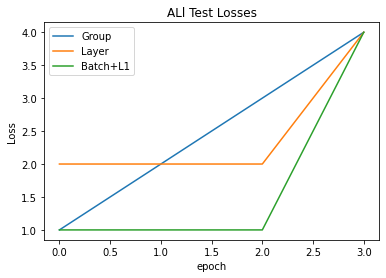

In [34]:
#All_train_losses[0]
#All_train_accuracies
#All_test_losses
#All_test_accuracies

plt.plot([1,2,3,4])
plt.plot([2,2,2,4])
plt.plot([1,1,1,4])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Group','Layer','Batch+L1'])
plt.title('ALl Test Losses')
 
plt.show()

In [12]:
train_losses

[tensor(0.0089, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.0092, device='cuda:0', grad_fn=<DivBackward0>)]